## Import Package and Data

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno 
%matplotlib inline

In [115]:
data = 'E:/GSB Analisis Data/Klien Andy/Train test.csv'
df = pd.read_csv(data,index_col = 'bcn_num')

In [116]:
# preview the dataset
df.head()

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NL20H682,0,2,0,43.0,2.0,30.0,5.0,723.0,0.0,0.0,618831.0,0.0,0.0,2623.0,54.0,87.0,4.0,2.0
NM20BGH8,0,3,0,47.0,1.0,34.0,2.0,820.0,0.0,0.0,3592059.0,0.0,0.0,266.0,57.0,88.0,3.0,3.0
NS206FC5,0,0,0,4.0,1.0,4.0,31.0,103.0,0.0,0.0,0.0,0.0,0.0,519.0,NaN,NaN,0.0,1.0
NM20HLAB,0,9,1,51.0,2.0,73.0,6.0,1760.0,0.0,0.0,609518.0,0.0,0.0,385.0,NaN,NaN,4.0,2.0
NN21CJHA,0,0,0,45.0,2.0,61.0,15.0,1484.0,0.0,32017.0,181616.0,0.0,844.0,4436.0,45.0,68.0,3.0,2.0


In [117]:
# view dimensions of dataset
df.shape

(460696, 18)

 We can see that there are 460696 instances and 18 variables in the dataset

In [118]:
col_names = df.columns
col_names

Index(['test_outcome', 'CountCases', 'CountWIFICases', 'obs_count',
       'upgrade_count', 'max_uptime_days', 'min_uptime_hr', 'max_uptime_hr',
       'wandown_cnt', 'lanwpktdrop', 'lanwpktdrop_5g', 'lanpwr_below100',
       'avg_lanwpkterred', 'avg_lanwpkterred_5g', 'minrssi', 'maxrssi',
       'max_assoc_dev', 'channel_change'],
      dtype='object')

In [119]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460696 entries, NL20H682 to NL216RVS
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_outcome         460696 non-null  int64  
 1   CountCases           460696 non-null  int64  
 2   CountWIFICases       460696 non-null  int64  
 3   obs_count            396706 non-null  float64
 4   upgrade_count        396706 non-null  float64
 5   max_uptime_days      375771 non-null  float64
 6   min_uptime_hr        375771 non-null  float64
 7   max_uptime_hr        375771 non-null  float64
 8   wandown_cnt          396706 non-null  float64
 9   lanwpktdrop          375771 non-null  float64
 10  lanwpktdrop_5g       375771 non-null  float64
 11  lanpwr_below100      396706 non-null  float64
 12  avg_lanwpkterred     375771 non-null  float64
 13  avg_lanwpkterred_5g  375771 non-null  float64
 14  minrssi              333243 non-null  float64
 15  maxrssi      

## Identify Missing Value

In [120]:
# check missing values in variables

df.isnull().sum()

test_outcome                0
CountCases                  0
CountWIFICases              0
obs_count               63990
upgrade_count           63990
max_uptime_days         84925
min_uptime_hr           84925
max_uptime_hr           84925
wandown_cnt             63990
lanwpktdrop             84925
lanwpktdrop_5g          84925
lanpwr_below100         63990
avg_lanwpkterred        84925
avg_lanwpkterred_5g     84925
minrssi                127453
maxrssi                127453
max_assoc_dev           84925
channel_change          63990
dtype: int64

<AxesSubplot:>

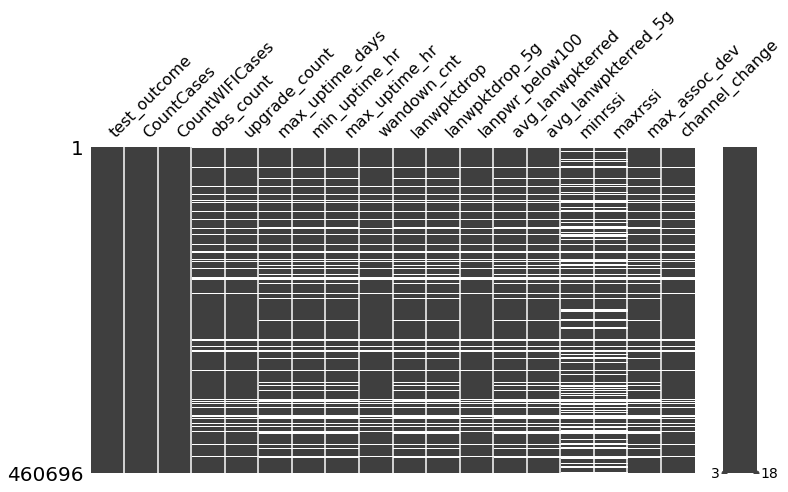

In [121]:
# visualize missing values in dataset 

# Visualize missing values as a matrix 
msno.matrix(df,figsize=(12,6)) 


<AxesSubplot:>

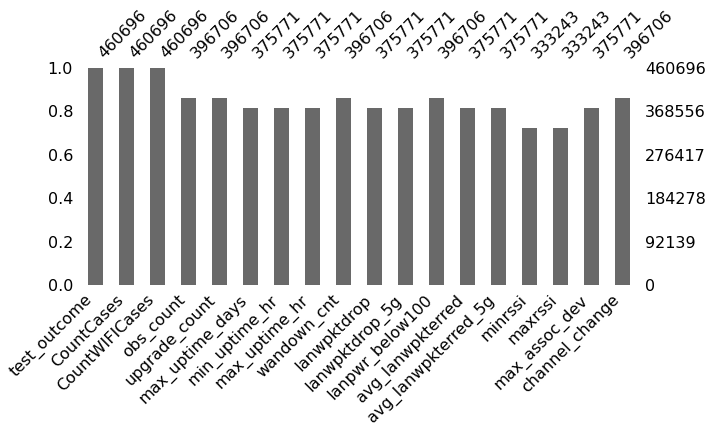

In [122]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,figsize=(10,4)) 

In [123]:
# find out the percentage of misssing vale in each column
Percent_Missing_Value = df.isnull().sum()*100/len(df)
Percent_Missing_Value

test_outcome            0.000000
CountCases              0.000000
CountWIFICases          0.000000
obs_count              13.889854
upgrade_count          13.889854
max_uptime_days        18.434065
min_uptime_hr          18.434065
max_uptime_hr          18.434065
wandown_cnt            13.889854
lanwpktdrop            18.434065
lanwpktdrop_5g         18.434065
lanpwr_below100        13.889854
avg_lanwpkterred       18.434065
avg_lanwpkterred_5g    18.434065
minrssi                27.665315
maxrssi                27.665315
max_assoc_dev          18.434065
channel_change         13.889854
dtype: float64

## Missing Value Treatment

#### List wise Deletion of Missing Value

In [124]:
df_listwise = df.dropna()

#### Pair wise Deletion of Missing Value

In [125]:
## Total no of samples where all column has NaN
df[(df["obs_count"].isnull()==True)&
    (df["upgrade_count"].isnull()==True)&
    (df["max_uptime_days"].isnull()==True)&
   (df["min_uptime_hr"].isnull()==True)&
   (df["max_uptime_hr"].isnull()==True)&
   (df["wandown_cnt"].isnull()==True)&
   (df["lanwpktdrop"].isnull()==True)&
   (df["lanwpktdrop_5g"].isnull()==True)&
   (df["lanpwr_below100"].isnull()==True)&
   (df["avg_lanwpkterred"].isnull()==True)&
   (df["avg_lanwpkterred_5g"].isnull()==True)&
   (df["minrssi"].isnull()==True)&
   (df["maxrssi"].isnull()==True)&
   (df["max_assoc_dev"].isnull()==True)&
   (df["channel_change"].isnull()==True)]

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NM20QWAB,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20THL6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20SWDF,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NL219S20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20TXNG,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NM20B97G,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NS1XEPNL,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NN213Z85,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see there are 63990 Rows where we have NaN value in all variable in the same row.We can delete these rows.

In [126]:
df_new = df.drop(df.index[(df["obs_count"].isnull()==True)&
               (df["upgrade_count"].isnull()==True)&
               (df["max_uptime_days"].isnull()==True)&
               (df["min_uptime_hr"].isnull()==True)&
               (df["max_uptime_hr"].isnull()==True)&
               (df["wandown_cnt"].isnull()==True)&
               (df["lanwpktdrop"].isnull()==True)&
               (df["lanwpktdrop_5g"].isnull()==True)&
               (df["lanpwr_below100"].isnull()==True)&
               (df["avg_lanwpkterred"].isnull()==True)&
               (df["avg_lanwpkterred_5g"].isnull()==True)&
               (df["minrssi"].isnull()==True)&
               (df["maxrssi"].isnull()==True)&
               (df["max_assoc_dev"].isnull()==True)&
               (df["channel_change"].isnull()==True)])

In [127]:
df_new.isnull().sum()

test_outcome               0
CountCases                 0
CountWIFICases             0
obs_count                  0
upgrade_count              0
max_uptime_days        20935
min_uptime_hr          20935
max_uptime_hr          20935
wandown_cnt                0
lanwpktdrop            20935
lanwpktdrop_5g         20935
lanpwr_below100            0
avg_lanwpkterred       20935
avg_lanwpkterred_5g    20935
minrssi                63463
maxrssi                63463
max_assoc_dev          20935
channel_change             0
dtype: int64

<AxesSubplot:>

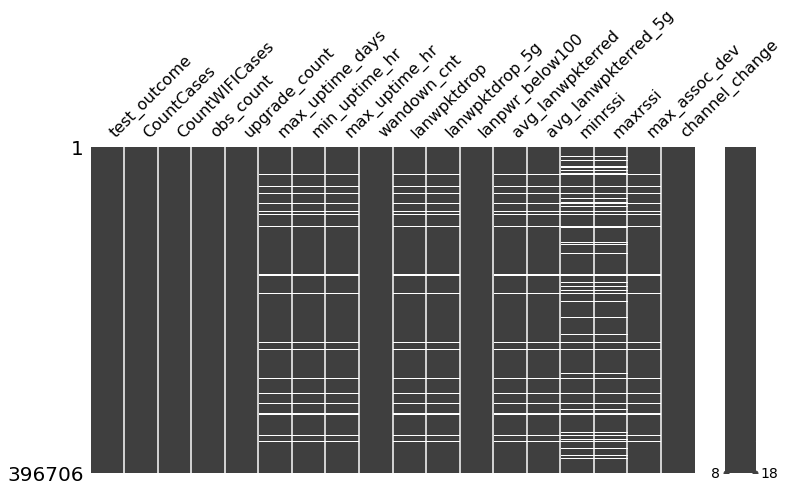

In [128]:
msno.matrix(df_new,figsize=(12,6)) 

#### from this plot we know that there are few obs that have paired missing value 

In [129]:
df_new2 = df_new.drop(df_new.index[
               (df_new["max_uptime_days"].isnull()==True)&
               (df_new["min_uptime_hr"].isnull()==True)&
               (df_new["max_uptime_hr"].isnull()==True)&
               (df_new["lanwpktdrop"].isnull()==True)&
               (df_new["lanwpktdrop_5g"].isnull()==True)&
               (df_new["avg_lanwpkterred"].isnull()==True)&
               (df_new["avg_lanwpkterred_5g"].isnull()==True)&
               (df_new["minrssi"].isnull()==True)&
               (df_new["maxrssi"].isnull()==True)&
               (df_new["max_assoc_dev"].isnull()==True)])

In [130]:
df_new2

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NL20H682,0,2,0,43.0,2.0,30.0,5.0,723.0,0.0,0.0,618831.0,0.0,0.0,2623.0,54.0,87.0,4.0,2.0
NM20BGH8,0,3,0,47.0,1.0,34.0,2.0,820.0,0.0,0.0,3592059.0,0.0,0.0,266.0,57.0,88.0,3.0,3.0
NS206FC5,0,0,0,4.0,1.0,4.0,31.0,103.0,0.0,0.0,0.0,0.0,0.0,519.0,NaN,NaN,0.0,1.0
NM20HLAB,0,9,1,51.0,2.0,73.0,6.0,1760.0,0.0,0.0,609518.0,0.0,0.0,385.0,NaN,NaN,4.0,2.0
NN21CJHA,0,0,0,45.0,2.0,61.0,15.0,1484.0,0.0,32017.0,181616.0,0.0,844.0,4436.0,45.0,68.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NL20CXFZ,0,2,0,55.0,2.0,47.0,22.0,1130.0,55.0,0.0,2956289.0,0.0,0.0,67715.0,49.0,52.0,1.0,3.0
NN20E998,1,3,0,48.0,2.0,0.0,1.0,23.0,0.0,0.0,88063.0,0.0,0.0,20.0,44.0,74.0,2.0,2.0
NL20V9KF,0,1,0,54.0,1.0,80.0,567.0,1935.0,0.0,195975.0,35318346.0,0.0,4302.0,1086.0,59.0,88.0,2.0,2.0


<AxesSubplot:>

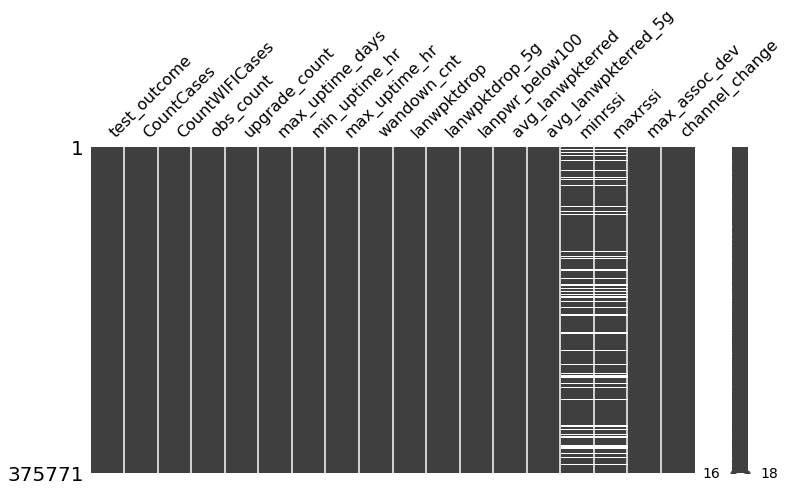

In [131]:
msno.matrix(df_new2,figsize=(12,6)) 

In [132]:
df_pairwise = df_new2.drop(df_new2.index[
               (df_new2["minrssi"].isnull()==True)&
               (df_new2["maxrssi"].isnull()==True) ])

In [133]:
df_pairwise.isna().sum() 

test_outcome           0
CountCases             0
CountWIFICases         0
obs_count              0
upgrade_count          0
max_uptime_days        0
min_uptime_hr          0
max_uptime_hr          0
wandown_cnt            0
lanwpktdrop            0
lanwpktdrop_5g         0
lanpwr_below100        0
avg_lanwpkterred       0
avg_lanwpkterred_5g    0
minrssi                0
maxrssi                0
max_assoc_dev          0
channel_change         0
dtype: int64

In [134]:
df_listwise.shape

(333243, 18)

In [135]:
df_pairwise.shape

(333243, 18)

#### turns out through listwise or pairwise i got same amount of obs 

In [136]:
df=df_pairwise

### Check The Balance Of Label Data

In [137]:
df['test_outcome'].value_counts()/df.shape[0]

0    0.946955
1    0.053045
Name: test_outcome, dtype: float64

Label Data Highly Imbalance

## Stratified Data Split

In [138]:
# split X and y into training and testing sets stratified
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, stratify=df.test_outcome)
X_train = train.drop(['test_outcome'], axis=1)
y_train = train['test_outcome']
X_test = test.drop(['test_outcome'], axis=1)
y_test = test['test_outcome']

<AxesSubplot:title={'center':'Verify that class distribution in train is same as input data'}, xlabel='test_outcome'>

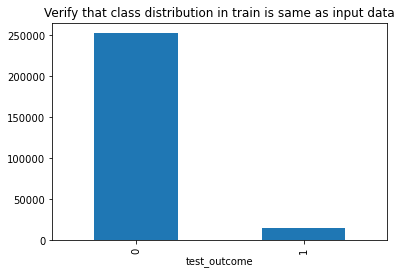

In [139]:
train.pivot_table(index='test_outcome', aggfunc='size').plot(kind='bar', title='Verify that class distribution in train is same as input data')

<AxesSubplot:title={'center':'Verify that class distribution in train is same as input data'}, xlabel='test_outcome'>

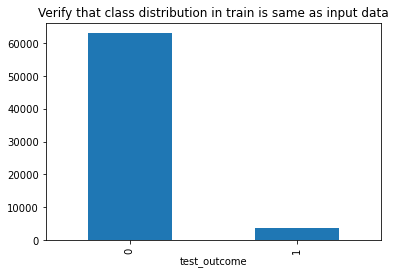

In [140]:
test.pivot_table(index='test_outcome', aggfunc='size').plot(kind='bar', title='Verify that class distribution in train is same as input data')

In [141]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((266594, 17), (66649, 17))

## SMOTE (Synthetic Minority Oversampling Technique)

`SMOTE (synthetic minority oversampling technique)` is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
`SMOTE synthesises` new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [142]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 14142
Before OverSampling, counts of label '0': 252452 

After OverSampling, the shape of train_X: (504904, 17)
After OverSampling, the shape of train_y: (504904,) 

After OverSampling, counts of label '1': 252452
After OverSampling, counts of label '0': 252452


In [143]:
X_test_res, y_test_res = smote.fit_resample(X_test, y_test.ravel())
print("Before OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test == 0)))

print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res == 0)))


Before OverSampling, counts of label '1': 3535
Before OverSampling, counts of label '0': 63114 

After OverSampling, the shape of test_X: (126228, 17)
After OverSampling, the shape of test_y: (126228,) 

After OverSampling, counts of label '1': 63114
After OverSampling, counts of label '0': 63114


<AxesSubplot:title={'center':'Class distribution after applying SMOTE'}, xlabel='test_outcome'>

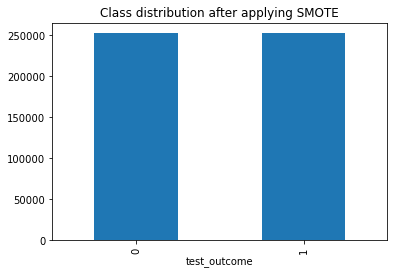

In [144]:
pd.Series(y_train_res).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='test_outcome')

<AxesSubplot:title={'center':'Class distribution after applying SMOTE'}, xlabel='test_outcome'>

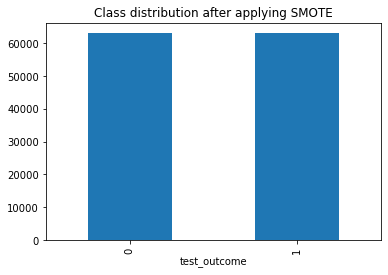

In [145]:
pd.Series(y_test_res).value_counts().plot(kind='bar', title='Class distribution after applying SMOTE', xlabel='test_outcome')

## NearMiss Algorithm (Undersampling)

In [146]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 14142
Before Undersampling, counts of label '0': 252452 

After Undersampling, the shape of train_X: (28284, 17)
After Undersampling, the shape of train_y: (28284,) 

After Undersampling, counts of label '1': 14142
After Undersampling, counts of label '0': 14142


In [147]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_test == 0)))
  
X_test_miss, y_test_miss = nr.fit_resample(X_test, y_test.ravel())
  
print('After Undersampling, the shape of test_X: {}'.format(X_test_miss.shape))
print('After Undersampling, the shape of test_y: {} \n'.format(y_test_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_test_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_test_miss == 0)))

Before Undersampling, counts of label '1': 3535
Before Undersampling, counts of label '0': 63114 

After Undersampling, the shape of test_X: (7070, 17)
After Undersampling, the shape of test_y: (7070,) 

After Undersampling, counts of label '1': 3535
After Undersampling, counts of label '0': 3535


<AxesSubplot:title={'center':'Class distribution after applying NearMiss'}, xlabel='test_outcome'>

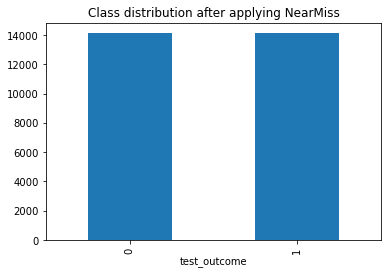

In [148]:
pd.Series(y_train_miss).value_counts().plot(kind='bar', title='Class distribution after applying NearMiss', xlabel='test_outcome')

<AxesSubplot:title={'center':'Class distribution after applying NearMiss'}, xlabel='test_outcome'>

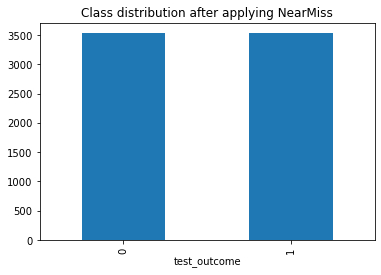

In [149]:
pd.Series(y_test_miss).value_counts().plot(kind='bar', title='Class distribution after applying NearMiss', xlabel='test_outcome')

# Build Model with Oversampling Sample

# Feature Scaling

In [150]:
X_train_res.describe()

,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
count,504904.000000,504904.000000,504904.000000,504904.000000,504904.000000,504904.000000,504904.000000,504904.000000,5.049040e+05,5.049040e+05,504904.000000,5.049040e+05,5.049040e+05,504904.000000,504904.000000,504904.000000,504904.000000
mean,2.095838,0.069819,47.620400,1.748613,38.891022,21.991678,944.691596,16.771055,1.239877e+06,2.519003e+07,0.043117,7.830947e+04,7.370374e+04,40.454941,75.640065,4.618164,2.214438
std,2.976343,0.332341,12.272225,0.431108,18.447702,82.633605,442.824133,22.579895,2.768184e+07,8.632777e+07,1.281601,4.860849e+06,4.450556e+06,12.378788,11.494928,3.332532,0.726968
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-81.000000,-56.000000,0.000000,1.000000
25%,0.000000,0.000000,44.663520,1.408877,25.673194,2.216997,625.000000,0.000000,0.000000e+00,4.974537e+05,0.000000,0.000000e+00,5.050000e+02,32.473248,69.642335,2.000000,2.000000
50%,1.000000,0.000000,52.083286,2.000000,37.937276,6.214163,916.767791,0.000000,1.270176e+04,3.823149e+06,0.000000,5.640000e+02,1.912018e+03,40.000000,78.000000,4.000000,2.000000
75%,3.000000,0.000000,55.000000,2.000000,51.375703,13.000000,1246.000000,40.534471,1.374600e+05,1.705890e+07,0.000000,6.088129e+03,7.400630e+03,47.579110,84.173609,6.000000,3.000000
max,150.000000,12.000000,61.000000,5.000000,247.000000,3981.000000,5950.000000,61.000000,2.147484e+09,2.147484e+09,60.000000,1.830318e+09,1.377901e+09,94.000000,95.000000,69.000000,11.000000


In [151]:
# Normalizing the features

from sklearn.preprocessing import MinMaxScaler

index_train_res = X_train_res.index
index_test_res = X_test_res.index

n_scaler = MinMaxScaler()
X_train_res = pd.DataFrame(n_scaler.fit_transform(X_train_res), index=index_train_res,columns=X_train_res.columns)
X_test_res = pd.DataFrame(n_scaler.transform(X_test_res), index=index_test_res,columns=X_test_res.columns)

#### now i have X_train_res dataset ready to be fed into the Logistic Regression classifier

## Training Model

In [152]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42).fit(X_train_res, y_train_res)



## Result Prediction 

In [153]:
y_pred_test_res = logreg.predict(X_test_res)

y_pred_test_res

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

## Accuracy Score

In [154]:
from sklearn.metrics import accuracy_score

print('The accuracy score is: %.3f' % accuracy_score(y_train_res, logreg.predict(X_train_res)))

The accuracy score is: 0.576


In [155]:
#Calculating Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_res.values, i) for i in range(X_train_res.shape[1])]
vif["features"] = X_train_res.columns

vif.round(1)

,VIF Factor,features
0,1.8,CountCases
1,1.2,CountWIFICases
2,24.7,obs_count
3,5.0,upgrade_count
4,25156.1,max_uptime_days
5,1.3,min_uptime_hr
6,25658.6,max_uptime_hr
7,1.7,wandown_cnt
8,1.0,lanwpktdrop
9,1.2,lanwpktdrop_5g


#### From table above i conclude that there is multicolinearity because VIF >10

## Variable Selection Using Stepwise 

In [156]:
#Function for Stepwise Feature Selection:

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.Logit(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [157]:
# Stepwise Feature Selection:

features = stepwise_selection(X_train_res, y_train_res)

Optimization terminated successfully.
         Current function value: 0.693004
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693082
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.687362
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.687961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.691710
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692123
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690786
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690768
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692686
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691634
  

In [158]:
print(features)

['wandown_cnt', 'CountWIFICases', 'max_assoc_dev', 'CountCases', 'max_uptime_hr', 'maxrssi', 'lanwpktdrop_5g', 'obs_count', 'max_uptime_days', 'lanpwr_below100', 'min_uptime_hr', 'minrssi', 'channel_change', 'avg_lanwpkterred_5g']


In [159]:
# Reducing training and test set to the selected features:

re_X_train_res = X_train_res[features]
re_X_test_res = X_test_res[features]

In [160]:
# Calculating VIF for the reduced features:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(re_X_train_res.values, i) for i in range(re_X_train_res.shape[1])]
vif["features"] = re_X_train_res.columns

vif.round(1)

,VIF Factor,features
0,1.7,wandown_cnt
1,1.2,CountWIFICases
2,4.4,max_assoc_dev
3,1.8,CountCases
4,25654.1,max_uptime_hr
5,116.7,maxrssi
6,1.2,lanwpktdrop_5g
7,23.5,obs_count
8,25153.2,max_uptime_days
9,1.0,lanpwr_below100


In [161]:
#Creating the reduced model: 

logreg2 = LogisticRegression().fit(re_X_train_res, y_train_res)

print('The accuracy score is: %.3f' % accuracy_score(y_train_res, logreg2.predict(re_X_train_res)))

The accuracy score is: 0.576


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
# New variables' coeficients:

np.round(logreg2.coef_, 2)

array([[ -0.52, -10.33,   1.54,   6.48,  -0.92,   0.97,  -1.79,   0.19,
         -0.59,   1.44,   0.56,  -0.15,   0.11,  -0.21]])

In [163]:
np.round(logreg2.intercept_, 2)

array([-0.64])

In [164]:
# Model scores with the test datapoints:

print('The accuracy score is: %.3f' % accuracy_score(y_test_res, logreg2.predict(re_X_test_res)))

The accuracy score is: 0.568


In [165]:
y_pred_test_res = logreg2.predict(re_X_test_res)

y_pred_test_res

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

## Confusion Matrix

In [166]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res, y_pred_test_res)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[31776 31338]
 [23139 39975]]

True Positives(TP) =  31776

True Negatives(TN) =  39975

False Positives(FP) =  31338

False Negatives(FN) =  23139


<AxesSubplot:>

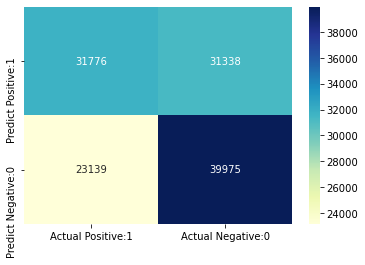

In [167]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report

In [168]:
from sklearn.metrics import classification_report

print(classification_report(y_test_res, logreg2.predict(re_X_test_res)))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54     63114
           1       0.56      0.63      0.59     63114

    accuracy                           0.57    126228
   macro avg       0.57      0.57      0.57    126228
weighted avg       0.57      0.57      0.57    126228



In [169]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [170]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5684


In [171]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.4316


In [172]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5035


In [173]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5786


In [174]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.5786


In [175]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4394


In [176]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5606


<AxesSubplot:>

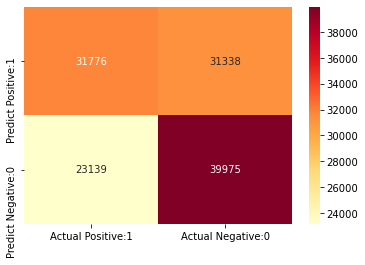

In [177]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrRd')

# Building Model with Undersampling Sample

# Feature Scaling

In [178]:
X_train_miss.describe()

,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
count,28284.000000,28284.000000,28284.000000,28284.000000,28284.000000,28284.000000,28284.000000,28284.000000,2.828400e+04,2.828400e+04,28284.000000,2.828400e+04,2.828400e+04,28284.000000,28284.000000,28284.000000,28284.000000
mean,2.320782,0.102390,38.478681,1.610981,29.350233,20.276517,715.546493,9.491868,6.067579e+05,1.041103e+07,0.043063,4.734318e+04,3.046832e+04,42.942618,72.326934,3.788856,2.106597
std,3.393344,0.412369,19.564516,0.512911,20.843306,72.000587,500.390058,19.511473,2.201735e+07,5.427163e+07,1.410904,4.528549e+06,1.597430e+06,14.740864,14.393380,3.341255,0.808364
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,25.000000,1.000000,12.000000,1.000000,299.000000,0.000000,0.000000e+00,1.440000e+03,0.000000,0.000000e+00,6.100000e+01,33.000000,64.000000,1.000000,1.000000
50%,1.000000,0.000000,47.000000,2.000000,27.000000,6.000000,670.000000,0.000000,0.000000e+00,6.934000e+04,0.000000,0.000000e+00,3.330000e+02,42.000000,75.000000,3.000000,2.000000
75%,3.000000,0.000000,54.000000,2.000000,44.000000,16.000000,1062.000000,1.000000,1.044000e+04,2.625294e+06,0.000000,4.930000e+02,1.630000e+03,52.000000,84.000000,5.000000,3.000000
max,76.000000,12.000000,61.000000,3.000000,177.000000,2254.000000,4248.000000,61.000000,2.147484e+09,2.147484e+09,59.000000,7.527602e+08,1.926220e+08,94.000000,95.000000,45.000000,10.000000


In [179]:
# Normalizing the features

from sklearn.preprocessing import MinMaxScaler

index_train_miss = X_train_miss.index
index_test_miss = X_test_miss.index

n_scaler = MinMaxScaler()
X_train_miss = pd.DataFrame(n_scaler.fit_transform(X_train_miss), index=index_train_miss,columns=X_train_miss.columns)
X_test_miss = pd.DataFrame(n_scaler.transform(X_test_miss), index=index_test_miss,columns=X_test_miss.columns)

#### now i have X_train dataset ready to be fed into the Logistic Regression classifier

## Training Model

In [182]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg3 = LogisticRegression(solver='liblinear', random_state=42).fit(X_train_miss, y_train_miss)


## Result Prediction 

In [183]:
y_pred_test_miss = logreg3.predict(X_test_miss)

y_pred_test_miss

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## Accuracy Score

In [184]:
from sklearn.metrics import accuracy_score

print('The accuracy score is: %.3f' % accuracy_score(y_train_miss, logreg3.predict(X_train_miss)))

The accuracy score is: 0.745


In [185]:
#Calculating Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_miss.values, i) for i in range(X_train_miss.shape[1])]
vif["features"] = X_train_miss.columns

vif.round(1)

,VIF Factor,features
0,1.8,CountCases
1,1.3,CountWIFICases
2,13.3,obs_count
3,3.6,upgrade_count
4,13946.7,max_uptime_days
5,1.3,min_uptime_hr
6,14241.8,max_uptime_hr
7,1.4,wandown_cnt
8,1.0,lanwpktdrop
9,1.1,lanwpktdrop_5g


#### From table above i conclude that there is multicolinearity because VIF >10

## Variable Selection Using RFECV

`Recursive feature elimination (RFE)` is a feature selection technique that helps us to select best features from the given number of features. At first, the model is built on all the given features. Then, it removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.

`Recursive Feature Elimination with Cross-Validated (RFECV)` feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination. Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.

In [186]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=10, scoring='accuracy')

rfecv = rfecv.fit(X_train_miss, y_train_miss)

In [187]:
print('The optimal number of features is {}'.format(rfecv.n_features_))
features2 = [f for f,s in zip(X_train_miss.columns, rfecv.support_) if s]
print('The selected features are:')
print ('{}'.format(features2))

The optimal number of features is 11
The selected features are:
['obs_count', 'max_uptime_days', 'min_uptime_hr', 'max_uptime_hr', 'wandown_cnt', 'lanwpktdrop', 'lanwpktdrop_5g', 'avg_lanwpkterred_5g', 'minrssi', 'maxrssi', 'max_assoc_dev']


In [188]:
print(features2)

['obs_count', 'max_uptime_days', 'min_uptime_hr', 'max_uptime_hr', 'wandown_cnt', 'lanwpktdrop', 'lanwpktdrop_5g', 'avg_lanwpkterred_5g', 'minrssi', 'maxrssi', 'max_assoc_dev']


In [189]:
# Reducing training and test set to the selected features:

re_X_train_miss = X_train_miss[features2]
re_X_test_miss = X_test_miss[features2]

In [190]:
# Calculating VIF for the reduced features:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(re_X_train_miss.values, i) for i in range(re_X_train_miss.shape[1])]
vif["features"] = re_X_train_miss.columns

vif.round(1)

,VIF Factor,features
0,10.2,obs_count
1,13926.5,max_uptime_days
2,1.2,min_uptime_hr
3,14221.6,max_uptime_hr
4,1.4,wandown_cnt
5,1.0,lanwpktdrop
6,1.1,lanwpktdrop_5g
7,1.0,avg_lanwpkterred_5g
8,10.9,minrssi
9,24.9,maxrssi


In [191]:
#Creating the reduced model: 

logreg4 = LogisticRegression().fit(re_X_train_miss, y_train_miss)

print('The accuracy score is: %.3f' % accuracy_score(y_train_miss, logreg4.predict(re_X_train_miss)))

The accuracy score is: 0.744


In [192]:
# New variables' coeficients:

np.round(logreg4.coef_, 2)

array([[ 1.89,  1.88,  2.66,  1.84,  1.01,  1.05, 15.68,  1.26, -1.48,
         1.81,  4.37]])

In [193]:
np.round(logreg4.intercept_, 2)

array([-3.15])

In [194]:
# Model scores with the test datapoints:

print('The accuracy score is: %.3f' % accuracy_score(y_test_miss, logreg4.predict(re_X_test_miss)))

The accuracy score is: 0.742


In [195]:
y_pred_test_miss = logreg4.predict(re_X_test_miss)

y_pred_test_miss

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## Confusion Matrix

In [196]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_miss, y_pred_test_miss)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2487 1048]
 [ 778 2757]]

True Positives(TP) =  2487

True Negatives(TN) =  2757

False Positives(FP) =  1048

False Negatives(FN) =  778


<AxesSubplot:>

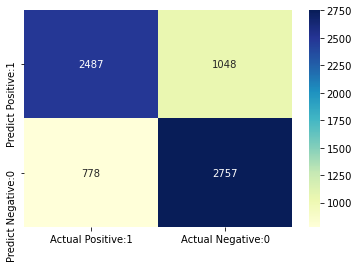

In [197]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report

In [198]:
from sklearn.metrics import classification_report

print(classification_report(y_test_miss, logreg4.predict(re_X_test_miss)))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3535
           1       0.72      0.78      0.75      3535

    accuracy                           0.74      7070
   macro avg       0.74      0.74      0.74      7070
weighted avg       0.74      0.74      0.74      7070



In [199]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [200]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7417


In [201]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2583


In [202]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7035


In [203]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7617


In [204]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7617


In [205]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2754


In [206]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7246


<AxesSubplot:>

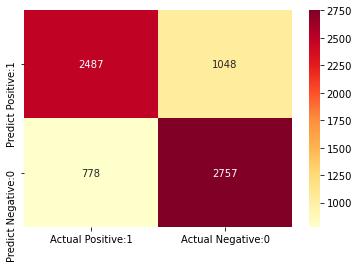

In [207]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrRd')

## Adjusting Threshold Level

In [211]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg4.predict_proba(re_X_test_miss)[:, 1]

Text(0, 0.5, 'Frequency')

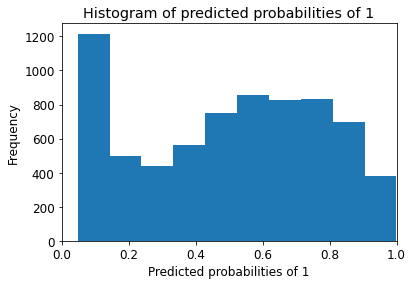

In [212]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of 1')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of 1')
plt.ylabel('Frequency')

In [219]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [217]:
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: 
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [221]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(re_X_train_miss, y_train_miss)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(re_X_train_miss, y_train_miss)
y_pred = lrt.predict(re_X_train_miss, threshold)

threshold

0.5198382916190795

## Model Improvement

I will use several techniques to improve the model performance. There are 3 techniques which are used in practice for performance improvement. There are `k-fold cross validation` and `hyperparameter optimization using GridSearchCV` and i use reduced dataset (after using stepwise selection)

## K-Fold Cross Validation 

In [101]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg4, re_X_train_miss, y_train_miss, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82290562 0.78402262 0.80134323 0.76210675 0.75070721 0.72595474
 0.71393211 0.69342291 0.67256011 0.67079208]


In [102]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7398


In [105]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg4, re_X_test_miss, y_test_miss, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79985856 0.79985856 0.73903819 0.70014144 0.67680339]


In [106]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7431


## Hyperparameter Optimization using GridSearch CV

In [223]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = logreg4,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

grid_search.fit(re_X_train_miss, y_train_miss)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [224]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8207


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000)


In [225]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(re_X_test_miss, y_test_miss)))

GridSearch CV score on test set: 0.8263


### Compare Models from Before Optimation and After Optimation (Hyperparameter Tuning)

In [226]:
print('Undersampling Accuracy score on test set is: %.4f' % accuracy_score(y_test_miss, logreg4.predict(re_X_test_miss)))
print('Undersampling + GridSearch CV Accuracy score on test set: {0:0.4f}'.format(grid_search.score(re_X_test_miss, y_test_miss)))

Undersampling Accuracy score on test set is: 0.7417
Undersampling + GridSearch CV Accuracy score on test set: 0.8263


Accuracy Score after Hyperparameter Tuning increase significantly

## Final Model

In [ ]:
#Final model: 
finallogreg = grid_search.fit(re_X_train_miss, y_train_miss)

In [ ]:
#Predict Result
y_pred_test = finallogreg.predict(X)
y_pred_test